In [24]:
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd    

In [25]:
file_path = 'Mall_Customers.csv'

# Read the CSV file
dataset = pd.read_csv(file_path)
# Display the first few rows of the DataFrame
print(dataset.head(20))


    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0            1    Male   19                  15                      39
1            2    Male   21                  15                      81
2            3  Female   20                  16                       6
3            4  Female   23                  16                      77
4            5  Female   31                  17                      40
5            6  Female   22                  17                      76
6            7  Female   35                  18                       6
7            8  Female   23                  18                      94
8            9    Male   64                  19                       3
9           10  Female   30                  19                      72
10          11    Male   67                  19                      14
11          12  Female   35                  19                      99
12          13  Female   58                  20                 

In [26]:
x = dataset.iloc[:, [3, 4]].values  

###  the elbow method uses the WCSS concept to draw the plot by plotting WCSS values on the Y-axis and the number of clusters on the X-axis. So we are going to calculate the value for WCSS for different k values ranging from 1 to 10.

C:\Users\91955\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


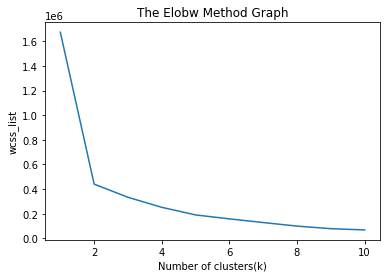

In [27]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

In [28]:
from kneed import KneeLocator

In [29]:
kl = KneeLocator(range(1, 11), wcss_list, curve="convex", direction="decreasing")
kl.elbow

2

### Here elbow point is at 2. So number of clusters will be 2.

In [30]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

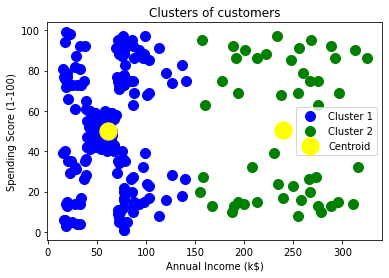

In [32]:
#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  

mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')  
mtp.legend()  
mtp.show()  